In [1]:
import sys
sys.path.append('../')
import wrangle
import explore
import nlp

In [2]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import numpy as np

In [3]:
def find_word_counts(input_column, max_df=.3, min_df=2, ngram_range=(1,3), stop_words='english'):
    input_column = input_column.dropna().apply(nlp.basic_clean)
    input_column = input_column.apply(nlp.lemmatize)
    cv = CountVectorizer(max_df=max_df, min_df=min_df, stop_words=stop_words, ngram_range=ngram_range)   
    cv_fit=cv.fit_transform(input_column)    
    word_list = cv.get_feature_names()    
    count_list = cv_fit.toarray().sum(axis=0)
    word_counts = {'word_list': word_list, 'count_list': count_list}
    df_word_count = pd.DataFrame(data=word_counts)
    return df_word_count

In [4]:
job_taxo_dict = {
    1: "UX Researcher",
    6: "Reseaerch and Design Manager",
    2: "UX Designer",
    5: "Specialist",
    7: "Consultant",
    8: "Executive",
    4: "Research Specialist",
    3: "Academic",
    9: "Other"
}

In [5]:
pd.set_option('display.max_columns', None)

df, data_dict = wrangle.wrangle_data()

In [6]:
df = explore.add_target_to_df(df)

targetB = df.targetb

targetB = targetB.reset_index().drop('resp_id',axis=1)

job_taxo = df.job_taxo.map(job_taxo_dict)

job_taxo = job_taxo.reset_index().drop('resp_id',axis=1)

big_df = pd.read_csv('topics.csv', index_col=False)

big_df.drop('Unnamed: 0', axis=1,inplace=True)

big_df['targetB'] = targetB

big_df['job_taxo'] = job_taxo

likely = big_df[big_df.targetB == 0]

In [7]:
likely.shape

(354, 33)

In [8]:
stop_words = ['like', 'plus', 'real', 'love', 'big', 'avoiding', 'mean', 'content', 'people', 'problem', 
              'doing', 'using','research', 'work', 'don', 'make', 'conference', 'yes', 've', 'ha', '300']

stopWords = nlp.set_stop_words(stop_words)

# Respondents NOT Likely To Go

## Sentiment

In [9]:
likely.big_answer.apply(nlp.find_polarity).mean()

0.21702682130075124

In [10]:
likely.big_answer.apply(nlp.find_subjectivity).mean()

0.4313958863792966

## TOTAL KEYWORDS

In [11]:
nlp.show_column_keywords(likely.big_answer, max_df=.8, stop_words=stopWords, ngram_range=(1,3))

['researchi',
 'phd',
 'library',
 'information',
 'science',
 'teaching',
 'involved',
 'ux',
 'architecture',
 'interned',
 'local',
 'firm',
 'doe',
 'additionally',
 'discipline',
 'increasingly',
 'data',
 'getting',
 'familiar',
 'self']

In [12]:
big_answer_df = find_word_counts(likely.big_answer, max_df=.2, stop_words=stopWords, ngram_range=(2,3))
big_answer_df.sort_values(by='count_list').tail(20)

,word_list,count_list
82,attendee experience timenananana,16
1286,wa great,16
990,service design,17
551,human factor,18
1193,topic covered,18
228,conduct researchmasters,19
1117,taught conduct researchmasters,19
19,500 attendeesmultitrack attendee,23
18,500 attendeesmultitrack,23
155,case study,32


## Most Common Job Titles

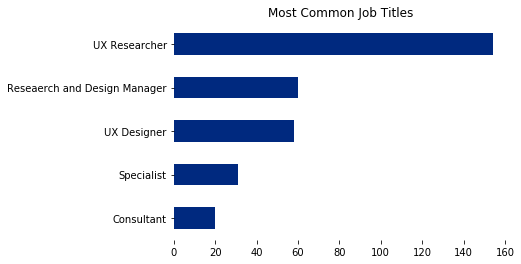

In [13]:
ax = likely.job_taxo.value_counts(ascending=True).tail(5).plot.barh(legend=False,
                                                       color="#00297f",
                                                       title="Most Common Job Titles")
ax.yaxis.set_label_text("")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

## What does your company do?

q5 primary industry

### keywords

In [14]:
nlp.show_column_keywords(likely.prim_ind_text, max_df=.5, stop_words=stopWords, ngram_range=(1,3))

['higher',
 'education',
 'higher education',
 'food',
 'financial',
 'banking',
 'health',
 'healthcare',
 'tech',
 'ux',
 'consulting',
 'ux consulting',
 'technology',
 'consultant',
 'company',
 'industry',
 'design',
 'cpg',
 'independent',
 'freelancer']

In [15]:
#words
prim_ind_df = find_word_counts(likely.prim_ind_text, max_df=.5, stop_words=stopWords, ngram_range=(1,3))
prim_ind_df.sort_values(by='count_list').tail(10)

,word_list,count_list
39,government,16
35,fintech,18
8,consulting,19
33,financial,19
76,software,21
79,tech,22
16,design,23
80,technology,24
42,healthcare,25
74,service,27


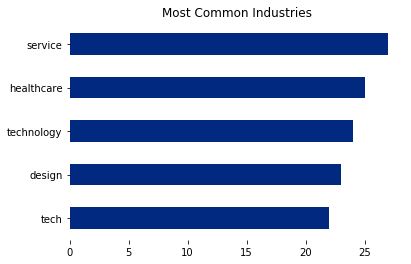

In [16]:
ax = prim_ind_df.sort_values(by='count_list').tail(5).plot.barh(x='word_list', 
                                                                y='count_list', 
                                                                legend=False, 
                                                                color="#00297f",
                                                                title="Most Common Industries")
ax.yaxis.set_label_text("")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

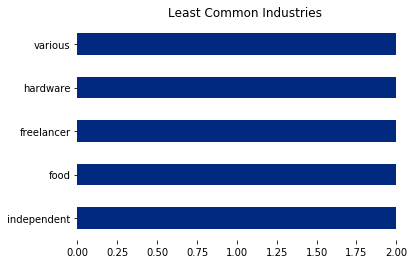

In [17]:
ax = prim_ind_df.sort_values(by='count_list').head(5).plot.barh(x='word_list', 
                                                                y='count_list', 
                                                                legend=False, 
                                                                color="#00297f",
                                                                title="Least Common Industries")
ax.yaxis.set_label_text("")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

In [18]:
nlp.show_column_keywords(likely.prim_ind_text, max_df=.5, stop_words=stopWords, ngram_range=(2,3))

['higher education',
 'ux consulting',
 'financial service',
 'consulting industry',
 'management consulting',
 'software design',
 'enterprise software',
 'information technology',
 'customer experience',
 'software service',
 'public sector',
 'product design',
 'estate tech',
 'digital product',
 'saas software',
 'fashion retail']

In [19]:
#ngrams
prim_ind_df = find_word_counts(likely.prim_ind_text, max_df=.5, stop_words=stopWords, ngram_range=(2,3))
prim_ind_df.sort_values(by='count_list').tail(5)

,word_list,count_list
7,higher education,3
10,product design,3
14,software service,3
3,enterprise software,4
6,financial service,15


In [20]:
likely[likely.prim_ind_text.notnull()].prim_ind_topic_id.value_counts()

fintech                52
commerce/consulting    52
tech                   46
education              45
misc                   43
healthcare             40
software               39
government             37
Name: prim_ind_topic_id, dtype: int64

## What kind of research are you doing?

q7 future_res

### keywords

In [21]:
nlp.show_column_keywords(likely.future_res_text, max_df=.5, stop_words=stopWords, ngram_range=(1,3))

['think',
 'focused',
 'social',
 'user',
 'usability',
 'study',
 'ethnographic',
 'customer',
 'interview',
 'user usability',
 'usability study',
 'service',
 'design',
 'thinking',
 'learning',
 'quant',
 'method',
 'qual',
 'analysis',
 'service design']

In [22]:
#words
future_res_text_df = find_word_counts(likely.future_res_text, max_df=.5, stop_words=stopWords, ngram_range=(1,3))
future_res_text_df.sort_values(by='count_list').tail(10)

,word_list,count_list
225,unmoderated,18
233,usability testing,21
42,diary,21
164,quantitative,22
237,user,22
35,data,25
122,method,26
230,usability,34
192,study,42
203,testing,56


In [23]:
nlp.show_column_keywords(likely.future_res_text, max_df=.5, stop_words=stopWords, ngram_range=(2,3))

['user usability',
 'usability study',
 'service design',
 'quant method',
 'card sorting',
 'unmoderated usability',
 'usability testing',
 'unmoderated usability testing',
 'study survey',
 'unmoderated usability study',
 'data science',
 'looking new',
 'new way',
 'looking new way',
 'testing card',
 'competitive analysis',
 'testing card sorting',
 'field study',
 'diary study',
 'multivariate testing']

In [24]:
#ngrams
future_res_text_df = find_word_counts(likely.future_res_text, max_df=.5, stop_words=stopWords, ngram_range=(2,3))
future_res_text_df.sort_values(by='count_list').tail(5)

,word_list,count_list
59,unmoderated usability,7
0,ab testing,9
7,contextual inquiry,9
12,diary study,18
64,usability testing,21


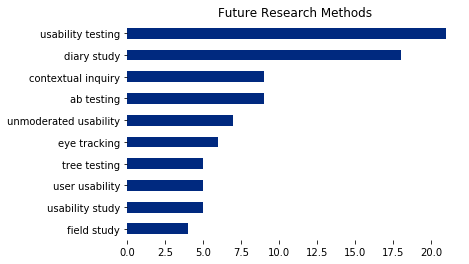

In [25]:
ax = future_res_text_df.sort_values(by='count_list').tail(10).plot.barh(x='word_list', 
                                                                       y='count_list',                                                                         
                                                                       legend=False, 
                                                                       color="#00297f",
                                                                       title="Future Research Methods")
ax.yaxis.set_label_text("")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

### topics

In [26]:
likely[likely.future_res_text.notnull()].future_res_topic_id.value_counts()

evaluative, quantitative, qualitative    74
focus group                              56
market research                          36
journey mapping                          30
misc                                     29
card sort                                26
moderate, unmoderate                     26
inquiry                                  25
Name: future_res_topic_id, dtype: int64

## What kind of research are you doing?

q6 types_res_used

### keywords

In [27]:
nlp.show_column_keywords(likely.types_res_text, max_df=.5, stop_words=stopWords, ngram_range=(1,3))

['conduct',
 'variety',
 'mix',
 'qualitative',
 'quantitative',
 'lot',
 'online',
 'mix qualitative',
 'qualitative quantitative',
 'mix qualitative quantitative',
 'interview',
 'workshop',
 'brainstorming',
 'market',
 'interview workshop',
 'ethnography',
 'mixed',
 'method',
 'qual',
 'quant']

In [28]:
#words
types_res_df = find_word_counts(likely.types_res_text, max_df=.5, stop_words=stopWords, ngram_range=(1,3))
types_res_df.sort_values(by='count_list').tail(10)

,word_list,count_list
66,contextual,43
450,test,52
408,study,61
336,qualitative,73
548,user,74
529,usability testing,93
424,survey,132
516,usability,156
460,testing,163
200,interview,166


In [29]:
nlp.show_column_keywords(likely.types_res_text, max_df=.5, stop_words=stopWords, ngram_range=(2,3))

['mix qualitative',
 'qualitative quantitative',
 'mix qualitative quantitative',
 'interview workshop',
 'mixed method',
 'qual quant',
 'quant survey',
 'survey focus',
 'focus group',
 'design thinking',
 'service design',
 'design methodology',
 'grounded theory',
 'theory analysis',
 'survey focus group',
 'grounded theory analysis',
 'product usability',
 'usability testing',
 'testing contextual',
 'contextual inquiry']

In [30]:
#ngrams
types_res_df = find_word_counts(likely.types_res_text, max_df=.5, stop_words=stopWords, ngram_range=(2,3))
types_res_df.sort_values(by='count_list').tail(10)

,word_list,count_list
278,testing survey,18
129,interview usability,18
125,interview survey,18
74,focus group,19
309,usability test,20
329,user interview,20
17,card sort,23
35,contextual inquiry,26
53,diary study,26
313,usability testing,93


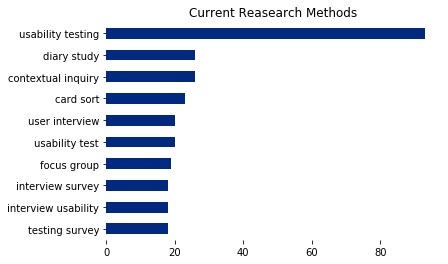

In [31]:
ax = types_res_df.sort_values(by='count_list').tail(10).plot.barh(x='word_list',
                                                                 y='count_list', 
                                                                 legend=False, 
                                                                 color="#00297f",
                                                                 title="Current Reasearch Methods")
ax.yaxis.set_label_text("")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

### topics

In [32]:
likely[likely.types_res_text.notnull()].types_res_topic_id.value_counts()

ngram                      60
focus group                55
validation                 52
market                     51
qual/quant                 40
testing                    37
misc                       25
generative/mixed method    22
Name: types_res_topic_id, dtype: int64

## What topics would they be most attracted to at a conference about research?

q21 ideal_topics

In [33]:
stop_words = ['like', 'plus', 'real', 'love', 'big', 'avoiding', 'mean', 'content', 'people', 'problem', 
              'doing', 'using','research', 'work', 'don', 'make', 'conference', 'good', 'best', 'self', 'report']

In [34]:
stopWords = nlp.set_stop_words(stop_words)

### keywords

In [35]:
nlp.show_column_keywords(likely.ideal_topics_text, max_df=.5, stop_words=stopWords, ngram_range=(1,3))

['new',
 'data',
 'analysis',
 'method',
 'analysis method',
 'buyin',
 'enterprise',
 'user',
 'program',
 'quant',
 'qual',
 'visualization',
 'method qual',
 'data visualization',
 'topic',
 'usability',
 'study',
 'test',
 'methodology',
 'example']

In [36]:
#words
ideal_topics_df = find_word_counts(likely.ideal_topics_text, max_df=.5, stop_words=stopWords, ngram_range=(1,3))
ideal_topics_df.sort_values(by='count_list').tail(10)

,word_list,count_list
375,researcher,25
68,case study,27
498,way,27
483,ux,29
67,case,32
426,study,34
440,team,34
108,data,34
293,new,36
278,method,66


In [37]:
nlp.show_column_keywords(likely.ideal_topics_text, max_df=.5, stop_words=stopWords, ngram_range=(2,3))

['analysis method',
 'method qual',
 'data visualization',
 'methodology used',
 'ab testing',
 'new method',
 'want learn',
 'learn new',
 'new interesting',
 'analysis reporting',
 'particularly interested',
 'interested learning',
 'managing project',
 'particularly interested learning',
 'bridge gap',
 'case study',
 'usability testing',
 'small team',
 'org structure',
 'impact new']

In [38]:
#bi-grams
ideal_topics_df = find_word_counts(likely.ideal_topics_text, max_df=.5, stop_words=stopWords, ngram_range=(2,3))
ideal_topics_df.sort_values(by='count_list').tail(5)

,word_list,count_list
4,analysis method,4
68,quant qual,4
78,stakeholder management,4
47,new method,11
12,case study,27


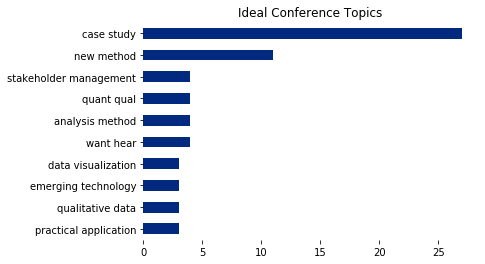

In [39]:
ax = ideal_topics_df.sort_values(by='count_list').tail(10).plot.barh(x='word_list', 
                                                                     y='count_list',
                                                                     legend=False, 
                                                                     color="#00297f",
                                                                     title="Ideal Conference Topics")
ax.yaxis.set_label_text("")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

### topics

In [40]:
likely[likely.ideal_topics_text.notnull()].ideal_topics_topic_id.value_counts()

new_method, mixed_method    76
quant/qual/data             72
ops/ai                      66
case_study                  62
Name: ideal_topics_topic_id, dtype: int64

## Who would they expect to see at a conference about research?

q22 Ideal Attendees

In [41]:
stop_words = ['like', 'plus', 'real', 'love', 'big', 'avoiding', 'mean', 'content', 'people', 'problem', 
              'doing', 'using','research', 'work', 'don', 'make', 'conference']

stopWords = nlp.set_stop_words(stop_words)

In [42]:
nlp.show_column_keywords(likely.ideal_attendees_text, max_df=.5, stop_words=stopWords)

['mix',
 'academic',
 'professional',
 'mix academic',
 'academic professional',
 'mix academic professional',
 'google',
 'apple',
 'google apple',
 'user',
 'leader',
 'arent',
 'afraid',
 'talk',
 'topic',
 'arent afraid',
 'healthcare',
 'trying',
 'innovation',
 'familiar']

In [43]:
#terms
ideal_attendees_df = find_word_counts(likely.ideal_attendees_text, max_df=.5, stop_words=stopWords, ngram_range=(1,3))
ideal_attendees_df.sort_values(by='count_list').tail(10)

,word_list,count_list
329,tech,14
3,academic,15
255,product,15
108,field,17
360,want,18
149,industry,24
237,organization,25
50,company,27
185,leader,30
273,researcher,45


In [44]:
nlp.show_column_keywords(likely.ideal_attendees_text, max_df=.5, stop_words=stopWords, ngram_range=(2,3))

['mix academic',
 'academic professional',
 'mix academic professional',
 'google apple',
 'arent afraid',
 'learn lot',
 'industry leader',
 'indi young',
 'steve portigal',
 'public sector',
 'speaking consulting',
 'leader organization',
 'case study',
 'kate towsey',
 'erika hall',
 'wide variety',
 'small large',
 'jared spool',
 'jan chipchase',
 'nn group']

In [45]:
#bigrams
ideal_attendees_df = find_word_counts(likely.ideal_attendees_text, max_df=.5, stop_words=stopWords, ngram_range=(2,3))
ideal_attendees_df.sort_values(by='count_list').tail(5)

,word_list,count_list
47,steve portigal,6
17,industry leader,6
19,jan chipchase,6
39,sam ladner,7
9,erika hall,8


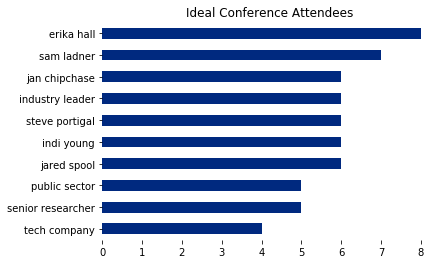

In [46]:
ax = ideal_attendees_df.sort_values(by='count_list').tail(10).plot.barh(x='word_list', 
                                                                       y='count_list', 
                                                                       legend=False, 
                                                                       color="#00297f",
                                                                       title="Ideal Conference Attendees")
ax.yaxis.set_label_text("")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

In [47]:
likely[likely.ideal_attendees_text.notnull()].ideal_attendees_topic_id.value_counts()

industry, team, product    92
indi young                 54
experience, jared spool    46
sam ladner, erika hall     44
Name: ideal_attendees_topic_id, dtype: int64

## What advice do they have for the Rosenfeld Media team in pursuing a conference?
q23 recommendations

In [48]:
nlp.show_column_keywords(likely.recommendations_text, max_df=.9, stop_words=stopWords, ngram_range=(1,7))

['actually',
 'feel',
 'biggest',
 'area',
 'series',
 'unconferences',
 'workshop',
 'presentation',
 'similar',
 'thing',
 've',
 'seen',
 'really',
 'cool',
 'design',
 'thinking',
 'community',
 'attendee',
 'use',
 'single']

In [49]:
stop_words = ['like', 'plus', 'real', 'love', 'big', 'avoiding', 'mean', 'content', 'problem', 
              'doing', 'using', 'work', 'don', 'make', 'yes', 've', 'ha', 'day', 'way',
              'research','conference','researcher','dont','just','people','make','talk',
             'good', 'event', 'getting', 'nan', 'know', 'think', 'sure']

stopWords = nlp.set_stop_words(stop_words)

In [50]:
#words
recommendations_df = find_word_counts(likely.recommendations_text, max_df=.5, stop_words=stopWords, ngram_range=(1,3))
recommendations_df.sort_values(by='count_list').tail(20)

,word_list,count_list
286,location,14
182,feel,14
305,method,15
230,idea,15
203,great,16
400,really,17
269,learn,17
551,want,17
215,help,18
99,company,18


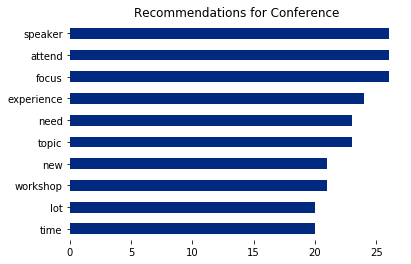

In [51]:
ax = recommendations_df.sort_values(by='count_list').tail(10).plot.barh(x='word_list', 
                                                                       y='count_list', 
                                                                       legend=False, 
                                                                       color="#00297f",
                                                                       title="Recommendations for Conference")
ax.yaxis.set_label_text("")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

In [52]:
nlp.show_column_keywords(likely.recommendations_text, max_df=.9, stop_words=stopWords, ngram_range=(2,7))

['workshop presentation',
 'really cool',
 'design thinking',
 'thinking community',
 'community attendee',
 'thinking community attendee',
 'thought leadership',
 'subject matter',
 'based experience',
 'world outside',
 'field ux',
 'add value',
 'll come',
 'point view',
 'expert field',
 'broad range',
 'easily accessible',
 'north america',
 'america europe',
 'north america europe']

In [53]:
#ngrams
recommendations_df = find_word_counts(likely.recommendations_text, max_df=.5, stop_words=stopWords, ngram_range=(2,3))
recommendations_df.sort_values(by='count_list').tail(5)

,word_list,count_list
4,attend want,3
1,actionable takeaway,3
42,point view,3
33,method interesting,3
9,case study,5


In [54]:
likely[likely.recommendations_text.notnull()].recommendations_topic_id.value_counts()

speaker, industry      66
event, opportunity     50
good, know             47
group, career, city    43
field, survery         26
Name: recommendations_topic_id, dtype: int64

## Top Documents per Topic

In [55]:
doc_term_matrix, count_vect = nlp.create_wordcount_matrix(likely.recommendations_text, max_df=.3, ngram=(1,3), stop_words=stopWords)

LDA = LatentDirichletAllocation(n_components=4, random_state=42)

LDA.fit(doc_term_matrix)

#nlp.find_top_documents_per_topic(LDA.transform(doc_term_matrix), likely.recommendations_text, 5)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=4, n_jobs=None,
                          perp_tol=0.1, random_state=42, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [56]:
recommendations_dict = {0 : 'speaker, industry', 
                        1 : 'event, opportunity', 
                        2 : 'good, know', 
                        3 : 'field, survery', 
                        4 : 'group, career, city'}

In [57]:
nlp.find_top_documents_per_topic(LDA.transform(doc_term_matrix), likely.recommendations_text, 5)

Top 5 Documents for Topic 0: 

Document 1
I've been in the field a little while and I'm most interested in topics that I haven't heard about before. I'm all for people getting their speaking / writing / thought leadership chops up but I am not interested in something I've already seen on Medium and elsewhere a dozen times. Novelty in subject matter and approach are what I find inspiring.

Document 2
Please make sure the workshops include diverse people from all backgrounds, don't make prerequisite to attending it very high, and don't let them be just 101s and they shouldn't feel rushed. In the workshops I attended the facilitators compressed their week long methods to fit into a 3 hour format rather and in the end we didn't feel like we learnt anything because it was so rushed. 

Make sure that people are able to deeply engage in it. 

Document 3
I actually feel like the biggest contribution to this area might be an unconference, or series of unconferences, where workshops and presenta